# ТЕСТОВОЕ ЗАДАНИЕ ДЛЯ MAILFIT

**ЦЕЛЬ:**

Посчитать следующие метрики:

- Delivery rate
- Open rate
- Click to Open rate
- Unsubscribe rate
- Лучшая тема
- Лучший день недели (для планирования рассылок)


## ИМПОРТ ДАТАСЕТА

In [22]:
import pandas as pd
from io import BytesIO
import requests

import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
from plotly import graph_objects as go
import scipy.stats as st 

In [2]:
spreadsheet_id = '1abxRHk2LguT-K3ewR6NZVwQh2gKTEU45EC9kZ-5PaOE'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
r = requests.get(file_name)

pd.set_option('max_columns', None)

In [3]:
df = pd.read_excel(BytesIO(r.content))

## ИЗУЧЕНИЕ ОБЩЕЙ ИНФОРМАЦИИ

In [4]:
df.head()

,Название рассылки,Название кампании,Направление,Месяц,Дата,Год,Номер недели,День недели,День недели.1,Время,Веб-версия,Тема письма,Сегмент,Отправлено,Доставлено,Открытия,Клики,Баунсы (Все ошибки),Отписки,UTM Метка,Пользователей на сайте,Воронка продаж. Шаг 1,Воронка продаж. Шаг 2,Воронка продаж. Шаг 3
0,Название рассылки 1,Название кампании 1,Email,Октябрь,2021-10-27,2021,43,3,03-среда,19:24:00,#ССЫЛКА,Тема письма 1,Сегмент 1,780789,741749.55,148349.910,17801.98920,39039.45,7417.4955,Метка 1,16377.830064,6336.582452,6209.850803,5154.176166
1,Название рассылки 10,Название кампании 10,Email,Ноябрь,2021-11-05,2021,45,5,05-пятница,12:02:00,#ССЫЛКА,Тема письма 10,Сегмент 2,719370,683401.50,123012.270,11071.10430,35968.50,6834.0150,Метка 10,10296.126999,3558.341491,3095.757097,2538.520820
2,Название рассылки 100,Название кампании 100,Email,Апрель,2022-04-11,2022,15,1,01-понедельник,16:26:00,#ССЫЛКА,Тема письма 100,Сегмент 3,1201415,1141344.25,182615.080,15339.66672,60070.75,11413.4425,Метка 100,13959.096715,3369.725947,2864.267055,2262.770973
3,Название рассылки 101,Название кампании 101,Email,Апрель,2022-04-12,2022,15,2,02-вторник,16:26:00,#ССЫЛКА,Тема письма 101,Сегмент 1,1393827,1324135.65,264827.130,10328.25807,69691.35,13241.3565,Метка 101,8985.584521,5116.391826,4277.303567,3207.977675
4,Название рассылки 102,Название кампании 102,Email,Апрель,2022-04-13,2022,15,3,03-среда,16:26:00,#ССЫЛКА,Тема письма 102,Сегмент 2,1276821,1212979.95,218336.391,15720.22015,63841.05,12129.7995,Метка 102,10846.951905,2816.953410,2287.366169,1669.777303


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Название рассылки       218 non-null    object        
 1   Название кампании       218 non-null    object        
 2   Направление             218 non-null    object        
 3   Месяц                   218 non-null    object        
 4   Дата                    218 non-null    datetime64[ns]
 5   Год                     218 non-null    int64         
 6   Номер недели            218 non-null    int64         
 7   День недели             218 non-null    int64         
 8   День недели.1           218 non-null    object        
 9   Время                   218 non-null    object        
 10  Веб-версия              218 non-null    object        
 11  Тема письма             218 non-null    object        
 12  Сегмент                 218 non-null    object    

**ВЫВОД:**
<hr style="border-color: green;">

Пропусков в данных нет

<hr style="border-color: green;"> 

Избавимся от возможных пробелов в названиях колонок:

In [6]:
df.columns = df.columns.str.strip()

Преобразуем типы столбцом, которые потребуются для подсчёта метрик в целые числа:

In [7]:
df[['Доставлено', 'Открытия', 'Клики', 'Отписки']] = (
    df[['Доставлено', 'Открытия', 'Клики', 'Отписки']].astype('int')
)

In [8]:
df['День недели.1'] = df['День недели.1'].str.replace('[\d\-]+', '', regex=True)

In [9]:
df.head()

,Название рассылки,Название кампании,Направление,Месяц,Дата,Год,Номер недели,День недели,День недели.1,Время,Веб-версия,Тема письма,Сегмент,Отправлено,Доставлено,Открытия,Клики,Баунсы (Все ошибки),Отписки,UTM Метка,Пользователей на сайте,Воронка продаж. Шаг 1,Воронка продаж. Шаг 2,Воронка продаж. Шаг 3
0,Название рассылки 1,Название кампании 1,Email,Октябрь,2021-10-27,2021,43,3,среда,19:24:00,#ССЫЛКА,Тема письма 1,Сегмент 1,780789,741749,148349,17801,39039.45,7417,Метка 1,16377.830064,6336.582452,6209.850803,5154.176166
1,Название рассылки 10,Название кампании 10,Email,Ноябрь,2021-11-05,2021,45,5,пятница,12:02:00,#ССЫЛКА,Тема письма 10,Сегмент 2,719370,683401,123012,11071,35968.50,6834,Метка 10,10296.126999,3558.341491,3095.757097,2538.520820
2,Название рассылки 100,Название кампании 100,Email,Апрель,2022-04-11,2022,15,1,понедельник,16:26:00,#ССЫЛКА,Тема письма 100,Сегмент 3,1201415,1141344,182615,15339,60070.75,11413,Метка 100,13959.096715,3369.725947,2864.267055,2262.770973
3,Название рассылки 101,Название кампании 101,Email,Апрель,2022-04-12,2022,15,2,вторник,16:26:00,#ССЫЛКА,Тема письма 101,Сегмент 1,1393827,1324135,264827,10328,69691.35,13241,Метка 101,8985.584521,5116.391826,4277.303567,3207.977675
4,Название рассылки 102,Название кампании 102,Email,Апрель,2022-04-13,2022,15,3,среда,16:26:00,#ССЫЛКА,Тема письма 102,Сегмент 2,1276821,1212979,218336,15720,63841.05,12129,Метка 102,10846.951905,2816.953410,2287.366169,1669.777303


## Delivery Rate

Подсчитаем **Delivery Rate** и создадим новый столбец:

In [10]:
df['delivery_rate'] = df['Доставлено'] / df['Отправлено'] * 100

In [11]:
df[['Доставлено', 'Отправлено', 'delivery_rate']].head()

,Доставлено,Отправлено,delivery_rate
0,741749,780789,94.999930
1,683401,719370,94.999930
2,1141344,1201415,94.999979
3,1324135,1393827,94.999953
4,1212979,1276821,94.999926


## Open Rate

Подсчитаем **Open Rate** и создадим новый столбец:

In [12]:
df['open_rate'] = df['Открытия'] / df['Доставлено'] * 100

In [13]:
df[['Открытия', 'Доставлено', 'open_rate']].sample(3)

,Открытия,Доставлено,open_rate
201,109178,988043,11.049924
190,235069,2127328,11.049965
17,129348,792575,16.319970


## CTOR (Click to Open rate)

Подсчитаем **Click to Open rate** и создадим новый столбец:

In [14]:
df['ctor'] = df['Клики'] / df['Открытия'] * 100

In [15]:
df[['Клики', 'Открытия', 'ctor']].sample(3)

,Клики,Открытия,ctor
53,13032,334175,3.899753
46,16551,183906,8.999706
139,16507,229275,7.199651


## Unsubscribe Rate

Подсчитаем **Unsubscribe Rate** и создадим новый столбец:

In [16]:
df['ur'] = df['Отписки'] / df['Доставлено'] * 100

In [17]:
df[['Отписки', 'Доставлено', 'ur']].sample(3)

,Отписки,Доставлено,ur
34,10265,1629385,0.629992
96,6893,1209410,0.569947
100,12514,2121084,0.589981


## Лучшая тема

На наш взгляд, лучшей темой для рассылки будет являться та тема, у которой процент кликов в письмах, открытых подписчиками выше остальных (CTOR).

Для этого, определим наивысший CTOR и соответсвующую тему, а так же остальные метрики:

In [18]:
df['ctor'].describe()

count    218.000000
mean       8.123104
std        2.630988
min        3.898751
25%        7.199580
50%        8.399792
75%        8.999928
max       12.000013
Name: ctor, dtype: float64

In [19]:
df[df['ctor'] == df['ctor'].max()][['Тема письма', 'delivery_rate', 'open_rate', 'ctor', 'ur']]

,Тема письма,delivery_rate,open_rate,ctor,ur
65,Тема письма 158,96.999956,17.999957,12.000013,0.589989


**ВЫВОД:**
<hr style="border-color: green;">

Лучшей темой является **"Тема 158"**.\
Письма с данной темой:
- чаще доходят до пользователя;
- выше процент писем, которые открыли получатели, среди всех доставленных сообщений;
- имеют высокий процент кликов в письмах;
- имеют меньшую долю отписок

<hr style="border-color: green;"> 

## Лучший день недели для планирования рассылок

Посмотрим на показатель CTOR в разрезе дней недели:

In [20]:
(
    df
    .pivot_table(index='День недели.1', values='ctor', aggfunc='mean')
    .reset_index()
    .sort_values(by='ctor', ascending=False)
)

,День недели.1,ctor
0,вторник,8.975693
1,понедельник,8.143871
2,пятница,8.134716
3,среда,8.009670
5,четверг,7.905292
4,суббота,6.839463


**ВЫВОД:**
<hr style="border-color: green;">

Во вторник в среднем процент кликов в письмах, которые подписчики открыли выше чем в другие дни.

<hr style="border-color: green;"> 

## ГРАФИКИ

### Динамика изменения метрик

In [152]:
dynamics = df.pivot_table(index='Месяц', values=['ctor', 'open_rate', 'ur'], aggfunc='mean')

dynamics = dynamics.reset_index()

dynamics.head()

,Месяц,ctor,open_rate,ur
0,Август,7.399623,15.493279,0.564972
1,Апрель,7.837199,15.316845,0.826841
2,Декабрь,7.940949,13.342320,5.113199
3,Июль,7.649746,14.841645,0.599953
4,Июнь,8.074722,15.293292,0.614952


In [156]:
months = ["Январь", "Февраль", "Март", "Апрель", "Май", "Июнь",
          "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]

dynamics['Месяц'] = pd.Categorical(dynamics['Месяц'], categories=months, ordered=True)

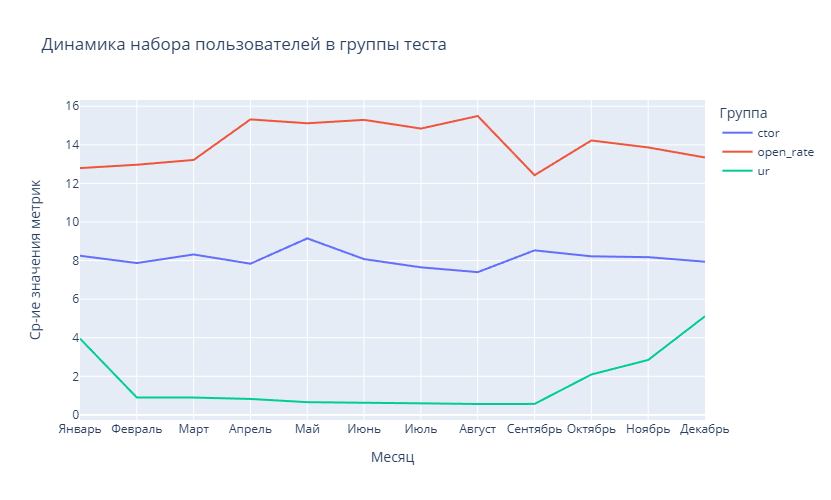

In [163]:
fig = px.line(dynamics.sort_values('Месяц'),
              x="Месяц",
              y=dynamics.columns,
              title="Динамика набора пользователей в группы теста")

fig.update_layout(width=800, height=500,
                  hoverlabel=dict(font_color="white"),
                 legend_title='Группа')

fig.update_xaxes(title='Месяц')
fig.update_yaxes(title='Ср-ие значения метрик')

fig.show()

**ВЫВОД:**
<hr style="border-color: green;">

На графике видно, что в пользователи больше склонны отписываться с осени по зиму (сентябрь - февраль). Далее средний коэффициент отписок составляет 0.89 (февраль-март) и снижается к концу лета до значения 0.56

<hr style="border-color: green;"> 

### Воронка продаж

In [77]:
funnel = (
    df
    .pivot_table(index='Сегмент',
                 values=['Воронка продаж. Шаг 1', 'Воронка продаж. Шаг 2', 'Воронка продаж. Шаг 3'],
                 aggfunc='sum')
    .reset_index()
)

funnel = funnel.rename(columns={'Сегмент': 'шаг_воронки'})

funnel

,шаг_воронки,Воронка продаж. Шаг 1,Воронка продаж. Шаг 2,Воронка продаж. Шаг 3
0,Сегмент 1,394412.223541,344313.899949,266167.741333
1,Сегмент 2,446090.270527,387420.441898,303791.190706
2,Сегмент 3,405811.512382,351268.004923,275577.762912


In [118]:
funnel_t = funnel.set_index('шаг_воронки').T

funnel_t = funnel_t.rename(columns={'Сегмент 1': 'сегмент_1', 'Сегмент 2': 'сегмент_2', 'Сегмент 3': 'сегмент_3'})

funnel_t = funnel_t.reset_index()
funnel_t.columns.name = None

funnel_t = funnel_t.rename(columns={'index': 'funnel_step'})

funnel_t

,funnel_step,сегмент_1,сегмент_2,сегмент_3
0,Воронка продаж. Шаг 1,394412.223541,446090.270527,405811.512382
1,Воронка продаж. Шаг 2,344313.899949,387420.441898,351268.004923
2,Воронка продаж. Шаг 3,266167.741333,303791.190706,275577.762912


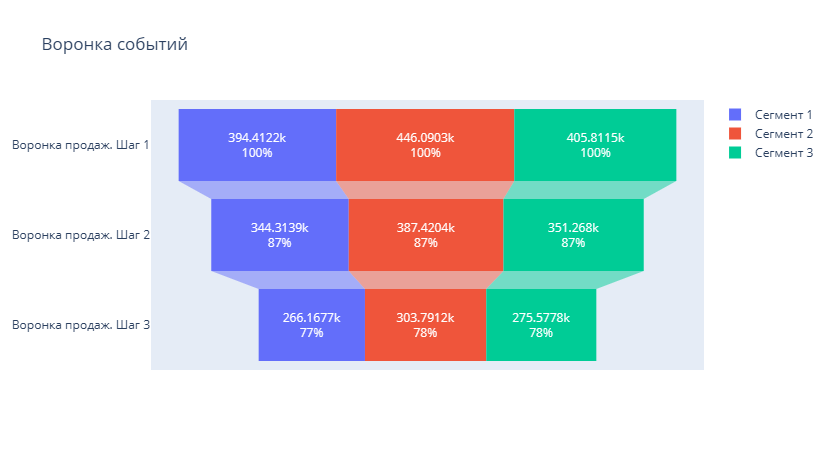

In [119]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Сегмент 1',
    y=funnel_t['funnel_step'],
    x=funnel_t['сегмент_1'],
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'Сегмент 2',
    orientation = "h",
    y=funnel_t['funnel_step'],
    x = funnel_t['сегмент_2'],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'Сегмент 3',
    orientation = "h",
    y=funnel_t['funnel_step'],
    x = funnel_t['сегмент_3'],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.update_layout(title='Воронка событий',
                  width=850,
                  height=450,
                  hoverlabel=dict(font_color="white"))

fig.update_traces(textfont_color='white',
                  hovertemplate="Стадия: %{y} <br>Доля от всех: %{percentTotal}\
                  <br>Доля с прошлой стадии: %{percentPrevious}<extra></extra>")

fig.show()

**ВЫВОД:**
<hr style="border-color: green;">

Наблюдаем, что не все пользователи доходят до последней стадии воронки продаж.

<hr style="border-color: green;"> 